# DATA SCIENCE CAPSTONE PROJECT

This notebook intends to analyse the weather and the road conditions about the possibility of getting into a vehicle road accident and how severe it would be.

# Analytic approach  

<div style="text-align: justify"> Automate the process of warning people about the possibility of getting into a road collision and how severe it would be based on the weather and the road conditions is not a straightforward problem as we need to come up with a way that is very robust to the many variations of weathers and road conditions we can have.

Since the business problem has been clearly stated, the analytic approach step entails expressing the problem in the context of statistical and machine-learning techniques, so that the entity or stakeholders with the problem can identify the most suitable techniques for the desired outcome.

*	Who: the data concern road collisions involving car, bicycle, pedestrian and vehicle.
*	What: the data measure the severity of the road accidents based on the weather and the road conditions 
*	Where: the data are collected on Seattle city in the state of Washington. The data are provided by SPD, recorded by Traffic Records and updated weekly
*	When: The period of collection is from 2004 to nowadays
*	Why: Explained in the previous paragraph called _Interest_ 

<div style="text-align: justify"> In this case study according to the goal, it is a supervised machine learning problem. The suitable models for the discrete dependant variable "severity" are classification models like: K-Nearest Neighbours (KNN), Decision tree and SVM. Those three models will be applied and the model with the best accuracy value will be retained as the final model. So, Let's start with data description


## DATA DESCRIPTION

In [27]:
# Import libraries

import pandas as pd
import numpy as np

In [28]:
# Read data file
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
# data shape: number of lines and columns
df.shape

(194673, 38)

In [30]:
# display columns' name
print(df.columns)

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [31]:
# Display top lines
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [32]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

###  Identify and handle missing values

In [33]:
df.count()

SEVERITYCODE      194673
X                 189339
Y                 189339
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
ADDRTYPE          192747
INTKEY             65070
LOCATION          191996
EXCEPTRSNCODE      84811
EXCEPTRSNDESC       5638
SEVERITYCODE.1    194673
SEVERITYDESC      194673
COLLISIONTYPE     189769
PERSONCOUNT       194673
PEDCOUNT          194673
PEDCYLCOUNT       194673
VEHCOUNT          194673
INCDATE           194673
INCDTTM           194673
JUNCTIONTYPE      188344
SDOT_COLCODE      194673
SDOT_COLDESC      194673
INATTENTIONIND     29805
UNDERINFL         189789
WEATHER           189592
ROADCOND          189661
LIGHTCOND         189503
PEDROWNOTGRNT       4667
SDOTCOLNUM        114936
SPEEDING            9333
ST_COLCODE        194655
ST_COLDESC        189769
SEGLANEKEY        194673
CROSSWALKKEY      194673
HITPARKEDCAR      194673
dtype: int64

In [34]:
# Identify missing values

df.replace("?", np.nan, inplace = True)
df.replace(" ", np.nan, inplace = True)
missing_data = df.isnull()
notmissind_data = df.notnull()

# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts(normalize=True))
    print("") 

SEVERITYCODE
False    1.0
Name: SEVERITYCODE, dtype: float64

X
False    0.9726
True     0.0274
Name: X, dtype: float64

Y
False    0.9726
True     0.0274
Name: Y, dtype: float64

OBJECTID
False    1.0
Name: OBJECTID, dtype: float64

INCKEY
False    1.0
Name: INCKEY, dtype: float64

COLDETKEY
False    1.0
Name: COLDETKEY, dtype: float64

REPORTNO
False    1.0
Name: REPORTNO, dtype: float64

STATUS
False    1.0
Name: STATUS, dtype: float64

ADDRTYPE
False    0.990106
True     0.009894
Name: ADDRTYPE, dtype: float64

INTKEY
True     0.665747
False    0.334253
Name: INTKEY, dtype: float64

LOCATION
False    0.986249
True     0.013751
Name: LOCATION, dtype: float64

EXCEPTRSNCODE
True     0.971039
False    0.028961
Name: EXCEPTRSNCODE, dtype: float64

EXCEPTRSNDESC
True     0.971039
False    0.028961
Name: EXCEPTRSNDESC, dtype: float64

SEVERITYCODE.1
False    1.0
Name: SEVERITYCODE.1, dtype: float64

SEVERITYDESC
False    1.0
Name: SEVERITYDESC, dtype: float64

COLLISIONTYPE
False    0.97

There are 19 Attributes with missing values as follow:

        *  ST_COLCODE: 2.5% 		        * ADDRTYPE: 1% 	       * LOCATION: 1.4% 
        *  PEDROWNOTGRNT: 97.6% 	       *  UNDERINFL: 2.5% 	     
        *  COLLISIONTYPE: 2.5% 	        *   ROADCOND: 2.6% 	       * WEATHER: 2.6% 
        *  LIGHTCOND: 2.6% 		         * Y: 2.7% 			      * X: 2.3% 
        *  EXCEPTRSNDESC: 97.1% 	       * JUNCTIONTYPE: 3.2% 	   * SPEEDING: 95.2% 
        *  INATTENTIONIND: 84.7%          * INTKEY: 66.6% 		    * SDOTCOLNUM: 40.9% 
        *  EXCEPTRSNCODE: 97.1%         * ST_COLDESC: 2.5%

**All the variables with more than 5% of missing value will be dropped.**


In [35]:
# Drop all the variables with more than 5% of missing values

df.drop(["INATTENTIONIND", "INTKEY", "SDOTCOLNUM", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "PEDROWNOTGRNT", "SPEEDING"], axis=1,inplace=True)

df.shape

(194673, 31)

In [36]:
# Replace missing values by 'Unknown'

df['WEATHER'].replace(np.nan,'Unknown', inplace=True)
df['ROADCOND'].replace(np.nan,'Unknown', inplace=True)

df['LIGHTCOND'].replace(np.nan,'Unknown', inplace=True)
df['LOCATION'].replace(np.nan,'Unknown', inplace=True)

df['JUNCTIONTYPE'].replace(np.nan,'Unknown', inplace=True)
df['ADDRTYPE'].replace(np.nan,'Unknown', inplace=True)
df['ST_COLDESC'].replace(np.nan,'Unknown', inplace=True)
df['COLLISIONTYPE'].replace(np.nan,'Unknown', inplace=True)

In [37]:
# Deal with missing values on the variables ST_COLCODE and UNDERINFL

df["ST_COLCODE"].replace(np.nan, 99, inplace=True)
df['UNDERINFL'].replace(np.nan,9, inplace=True)

### Binning variables

In [38]:
# Binning categorial variables.
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['UNDERINFL'].replace(to_replace=['0','1'], value=[0,1],inplace=True)
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

df['STATUS'].replace(to_replace=['Unmatched', 'Matched'], value=[0,1],inplace=True)

In [39]:
# Convert variables types
df[["HITPARKEDCAR"]].astype("int")
df[["UNDERINFL"]].astype("int")
df[["STATUS"]].astype("int")
df[["ST_COLCODE"]].astype("int")

#  Correlation between quantitatives attributes
df.corr()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,STATUS,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,UNDERINFL,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.030967,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.024107,0.104276,0.175093,-0.101498
X,0.010309,1.000000,-0.160262,0.009956,0.010309,0.010300,0.002805,0.010309,0.012887,0.011304,-0.001752,-0.012168,0.010904,-0.007413,-0.001618,0.013586,-0.016511
Y,0.017737,-0.160262,1.000000,-0.023848,-0.027396,-0.027415,-0.001490,0.017737,-0.013850,0.010178,0.026304,0.017058,-0.019694,0.000498,0.004618,0.009508,-0.012557
OBJECTID,0.020131,0.009956,-0.023848,1.000000,0.946383,0.945837,-0.163938,0.020131,-0.062333,0.024604,0.034432,-0.094280,-0.037094,0.162571,0.028076,0.056046,0.230437
INCKEY,0.022065,0.010309,-0.027396,0.946383,1.000000,0.999996,-0.192216,0.022065,-0.061500,0.024918,0.031342,-0.107528,-0.027617,0.190480,0.019701,0.048179,0.254739
COLDETKEY,0.022079,0.010300,-0.027415,0.945837,0.999996,1.000000,-0.192383,0.022079,-0.061403,0.024914,0.031296,-0.107598,-0.027461,0.190649,0.019586,0.048063,0.254789
STATUS,0.030967,0.002805,-0.001490,-0.163938,-0.192216,-0.192383,1.000000,0.030967,0.067552,0.030077,0.027214,0.488122,0.053607,-0.988498,0.005654,0.009867,-0.020309
SEVERITYCODE.1,1.000000,0.010309,0.017737,0.020131,0.022065,0.022079,0.030967,1.000000,0.130949,0.246338,0.214218,-0.054686,0.188905,-0.024107,0.104276,0.175093,-0.101498
PERSONCOUNT,0.130949,0.012887,-0.013850,-0.062333,-0.061500,-0.061403,0.067552,0.130949,1.000000,-0.023464,-0.038809,0.380523,-0.128960,-0.063650,-0.021383,-0.032258,-0.052766
PEDCOUNT,0.246338,0.011304,0.010178,0.024604,0.024918,0.024914,0.030077,0.246338,-0.023464,1.000000,-0.016920,-0.261285,0.260393,-0.027414,0.001810,0.565326,-0.035264


In [40]:
# Drop all high correlated variables
df.drop(['SEVERITYCODE.1','INCKEY', 'COLDETKEY'] , axis=1,inplace=True)

In [41]:
# Number of unique values

print("Number of unique REPORTNO", df['REPORTNO'].nunique())
print("Number of unique OBJECTID", df['OBJECTID'].nunique())


Number of unique REPORTNO 194670
Number of unique OBJECTID 194673


In [42]:
df.drop(['REPORTNO', 'OBJECTID'] , axis=1,inplace=True)

In [43]:
df.drop(['X', 'Y', 'UNDERINFL', 'STATUS'] , axis=1,inplace=True)

In [44]:
df.count()

SEVERITYCODE     194673
ADDRTYPE         194673
LOCATION         194673
SEVERITYDESC     194673
COLLISIONTYPE    194673
PERSONCOUNT      194673
PEDCOUNT         194673
PEDCYLCOUNT      194673
VEHCOUNT         194673
INCDATE          194673
INCDTTM          194673
JUNCTIONTYPE     194673
SDOT_COLCODE     194673
SDOT_COLDESC     194673
WEATHER          194673
ROADCOND         194673
LIGHTCOND        194673
ST_COLCODE       194673
ST_COLDESC       194673
SEGLANEKEY       194673
CROSSWALKKEY     194673
HITPARKEDCAR     194673
dtype: int64

In [45]:
df.describe(include=['object'])

,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC
count,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673,194673
unique,4,24103,2,11,5985,162058,7,39,11,9,9,115,63
top,Block,Unknown,Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",Clear,Dry,Daylight,32,One parked--one moving
freq,126926,2677,136485,47987,96,96,89800,85209,111135,124510,116137,27612,44421


### At this point the extracted data for our data analysis are the following

In [46]:
print(df.columns)

Index(['SEVERITYCODE', 'ADDRTYPE', 'LOCATION', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')


In [48]:
df['SEVERITYDESC'].value_counts(normalize=True).to_frame() 


,SEVERITYDESC
Property Damage Only Collision,0.701099
Injury Collision,0.298901


In [49]:
df['ADDRTYPE'].value_counts(normalize=True).to_frame()

,ADDRTYPE
Block,0.651996
Intersection,0.334253
Unknown,0.009894
Alley,0.003858


In [50]:
# Format the date

df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['days'] = df['INCDTTM'].dt.dayofweek
df['years'], df['months'] = df['INCDTTM'].dt.year, df['INCDTTM'].dt.month
df[['years','months', 'days']][0:5]
#df['INCDATE'].equals(df['INCDTTM'])

,years,months,days
0,2013,3,2
1,2006,12,2
2,2004,11,3
3,2013,3,4
4,2004,1,2


In [51]:
# let's examine the types of the column labels for data visualization
all(isinstance(column, str) for column in df.columns)

#For consistency, ensure that all column labels of type string

True

years
2004    11865
2005    15115
2006    15188
2007    14456
2008    13660
2009    11734
2010    10808
2011    10919
2012    10907
2013    10577
2014    11841
2015    12995
2016    11659
2017    10873
2018    10419
2019     9412
2020     2245
Name: SEVERITYCODE, dtype: int64


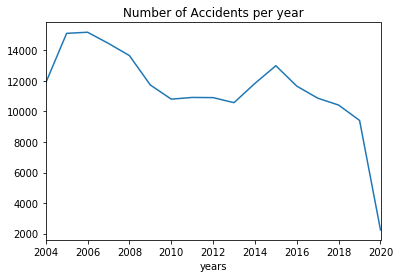

In [56]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt


acc_year = df.groupby(['years'])['SEVERITYCODE'].count()

print(acc_year)
acc_year.plot(title='Number of Accidents per year')